In [1]:
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
#climatico
file1=r"E:\analysis\climatic_data_final.csv"
file2=r"E:\analysis\climatic_data_final_month.csv"
file3=r"E:\analysis\climatic_data_final_year.csv"

#producao
file4=r"E:\analysis\dfproducao_melt.csv"

#processamento
file5=r"E:\analysis\processamentototal.csv"

climatic_data_final = pd.read_csv(file1,sep=';',decimal=',')
climatic_data_final_month = pd.read_csv(file2,sep=';',decimal=',')
climatic_data_final_year = pd.read_csv(file3,sep=';',decimal=',')
dfproducao_melt = pd.read_csv(file4,sep=';',decimal=',')
processamentototal = pd.read_csv(file5,sep=';',decimal=',')


In [3]:
climatic_data_final['data'] = pd.to_datetime(climatic_data_final['data'])
climatic_data_final_month['data'] = pd.to_datetime(climatic_data_final_month['data'])
climatic_data_final_year['data'] = pd.to_datetime(climatic_data_final_year['data'])

In [4]:
climatic_data_final.dtypes


data                  datetime64[ns]
precipitacao_total           float64
temp_max                     float64
temp_min                     float64
humid_media                  float64
temp_media                   float64
dtype: object

In [5]:
climatic_data_final_month

,data,precipitacao_total,temp_max,temp_min,humid_media,temp_media
0,2006-01-31,4.60,30.64,19.97,70.86,25.30
1,2006-02-28,2.49,29.89,18.80,70.10,24.35
2,2006-03-31,3.10,28.51,18.09,70.33,23.30
3,2006-04-30,3.14,24.76,14.98,72.37,19.87
4,2006-05-31,3.43,20.33,10.81,78.47,15.57
...,...,...,...,...,...,...
187,2021-08-31,2.75,21.50,10.82,77.73,16.16
188,2021-09-30,5.85,22.19,12.95,81.26,17.57
189,2021-10-31,4.16,24.19,13.09,73.39,18.64
190,2021-11-30,2.14,27.52,15.65,69.03,21.59


In [6]:
climatic_data_final_year

,data,precipitacao_total,temp_max,temp_min,humid_media,temp_media
0,2006-12-31,3.57,24.67,14.69,73.77,19.68
1,2007-12-31,4.68,23.76,13.80,77.39,18.78
2,2008-12-31,3.93,23.87,13.71,75.63,18.79
3,2009-12-31,4.97,23.86,13.77,77.15,18.82
4,2010-12-31,4.33,23.67,13.75,76.94,18.71
5,2011-12-31,4.14,23.57,13.62,76.53,18.59
6,2012-12-31,3.72,24.93,14.40,73.75,19.66
7,2013-12-31,4.41,23.66,13.46,76.07,18.56
8,2014-12-31,5.57,24.56,14.86,77.83,19.71
9,2015-12-31,5.80,24.25,14.99,79.42,19.62


In [7]:
dfproducao_melt = dfproducao_melt[(dfproducao_melt['tipo'] == 'VINHO DE MESA') | (dfproducao_melt['tipo'] == 'VINHO FINO DE MESA (VINÍFERA)')]
dfproducao_melt

,id,tipo,produto,ano,Total
0,2,VINHO DE MESA,Tinto,2006,149552555
1,3,VINHO DE MESA,Branco,2006,31738390
2,4,VINHO DE MESA,Rosado,2006,3809942
3,6,VINHO FINO DE MESA (VINÍFERA),Tinto,2006,18868108
4,7,VINHO FINO DE MESA (VINÍFERA),Branco,2006,13249969
...,...,...,...,...,...
753,3,VINHO DE MESA,Branco,2022,30198430
754,4,VINHO DE MESA,Rosado,2022,1988968
755,6,VINHO FINO DE MESA (VINÍFERA),Tinto,2022,24417918
756,7,VINHO FINO DE MESA (VINÍFERA),Branco,2022,20896613


In [8]:
processamentototal

,Ano,Vinhos,Total,Tipo
0,2006,Total,22335925,Brancas/Rosadas
1,2007,Total,28254191,Brancas/Rosadas
2,2008,Total,34602464,Brancas/Rosadas
3,2009,Total,32556903,Brancas/Rosadas
4,2010,Total,22104122,Brancas/Rosadas
...,...,...,...,...
1128,2020,Touriga Nacional,150166,Tinto
1129,2021,Touriga Nacional,38910,Tinto
1130,2006,Trincdeira,3591,Tinto
1131,2007,Trincdeira,255,Tinto


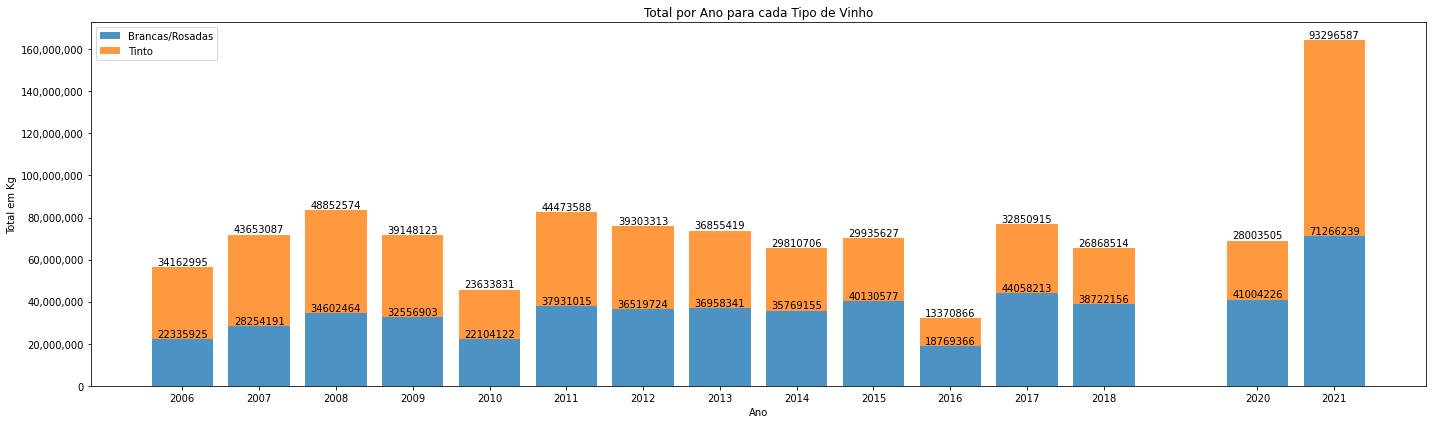

<Figure size 432x288 with 0 Axes>

In [38]:
# Plotar o gráfico de barras empilhadas
grouped = processamentototal[processamentototal['Vinhos'] != 'Total']
grouped = grouped.groupby(['Ano', 'Tipo'])['Total'].sum().unstack()

plt.figure(figsize=(20, 6))
bars = plt.bar(grouped.index, grouped['Brancas/Rosadas'], label='Brancas/Rosadas', alpha=0.8)
bars2 = plt.bar(grouped.index, grouped['Tinto'], bottom=grouped['Brancas/Rosadas'], label='Tinto', alpha=0.8)

plt.xlabel('Ano')
plt.ylabel('Total em Kg')
plt.title('Total por Ano para cada Tipo de Vinho')
plt.xticks(grouped.index)
plt.legend()

# Adicionar os valores nas barras
for bar, bar2 in zip(bars, bars2):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')
    yval2 = bar2.get_height()
    plt.text(bar2.get_x() + bar2.get_width() / 2, yval + yval2, int(yval2), va='bottom', ha='center')

plt.ticklabel_format(axis='y', style='plain')

formatter = FuncFormatter(lambda x, _: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

"https://www.embrapa.br/busca-de-noticias/-/noticia/9103859/safra-da-uva-2016----o-que-esta-acontecendo"

Produção e processamento de uvas com queda historica em 2016 afetando o processamento principalmente por questoes climaticas e excesso de chuvas

El Nino

Já no Brasil (e em outros países produtores de vinhos do Hemisfério Sul), o período se dá entre o fim de janeiro e o fim de março. Climas nos meses anteriores afetam a safra

In [10]:
top5 = processamentototal[processamentototal['Vinhos'] != 'Total']

top_5_por_ano = top5.groupby('Ano').apply(lambda x: x.nlargest(5, 'Total')).reset_index(drop=True)

top_5_por_ano


,Ano,Vinhos,Total,Tipo
0,2006,Cabernet Sauvignon,12063009,Tinto
1,2006,Moscato Branco,10748618,Brancas/Rosadas
2,2006,Merlot,8449561,Tinto
3,2006,Cabernet Franc,3285083,Tinto
4,2006,Tannat,3055931,Tinto
...,...,...,...,...
70,2021,Riesling Italico,20399648,Brancas/Rosadas
71,2021,Cabernet Franc,16626545,Tinto
72,2021,Aspirant Bouschet,15691137,Tinto
73,2021,Riesling Renano,13385970,Brancas/Rosadas


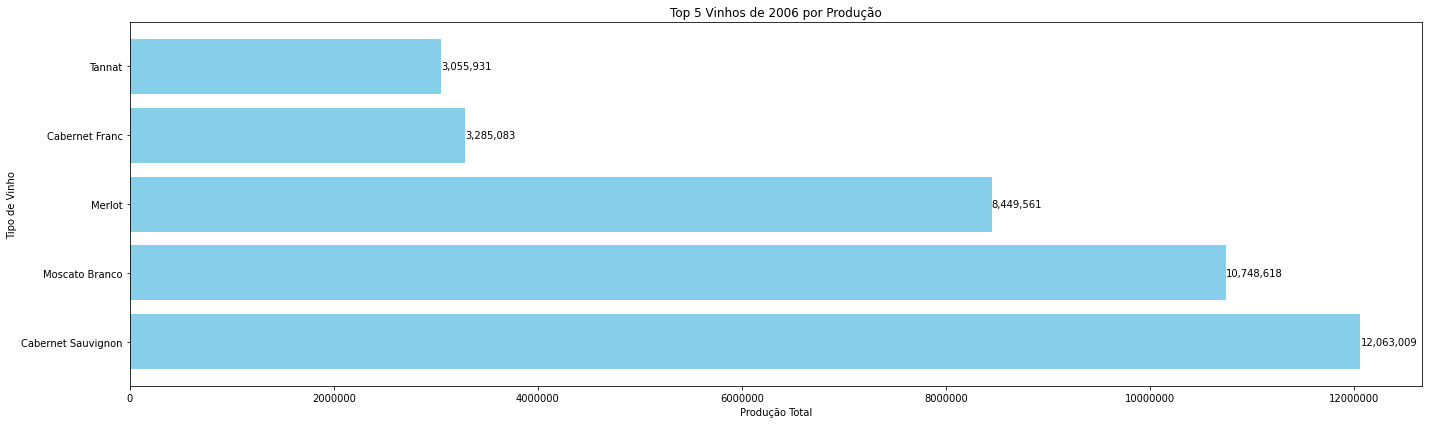

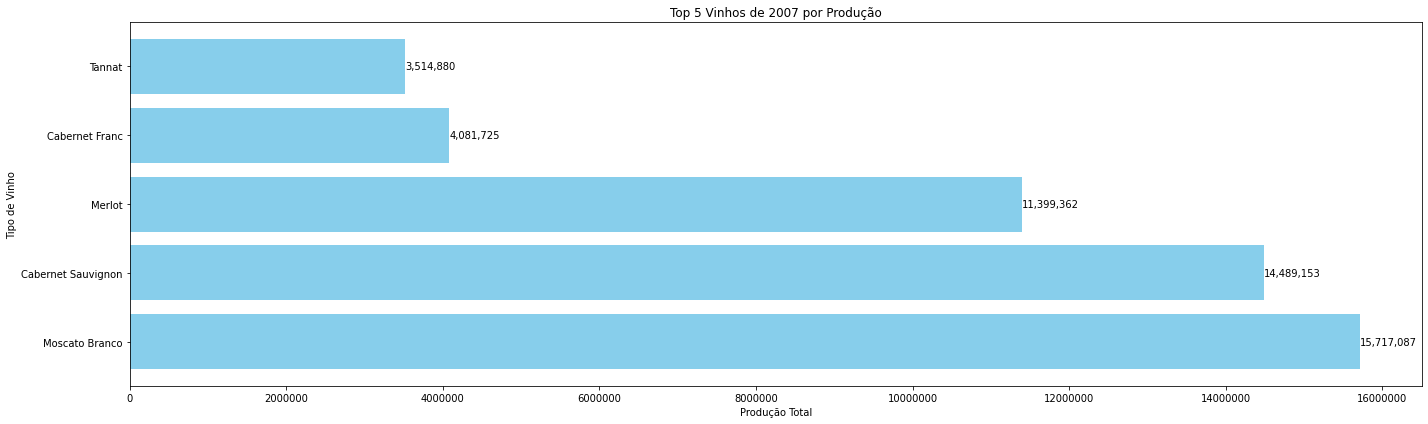

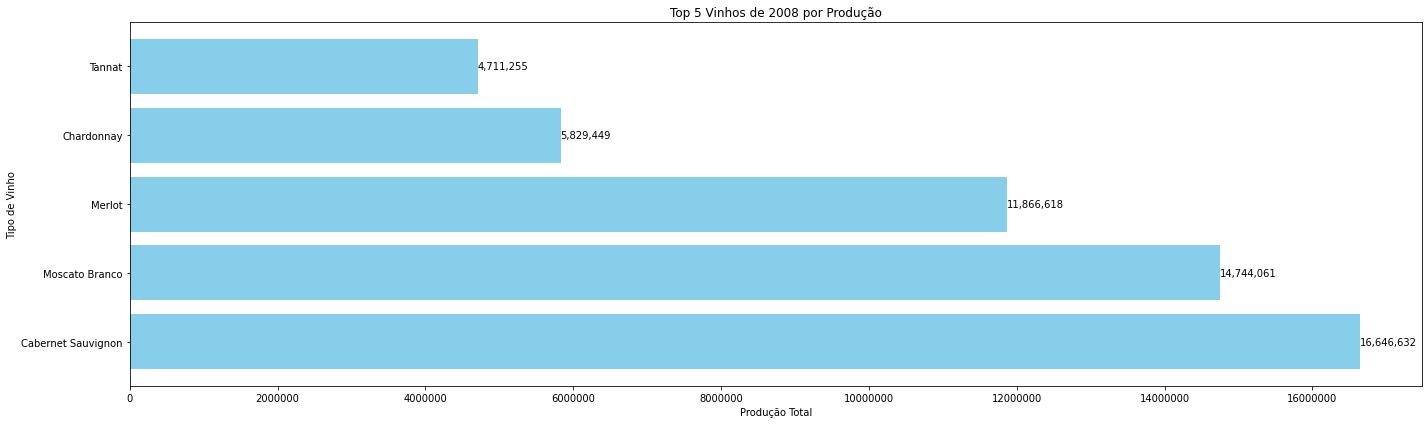

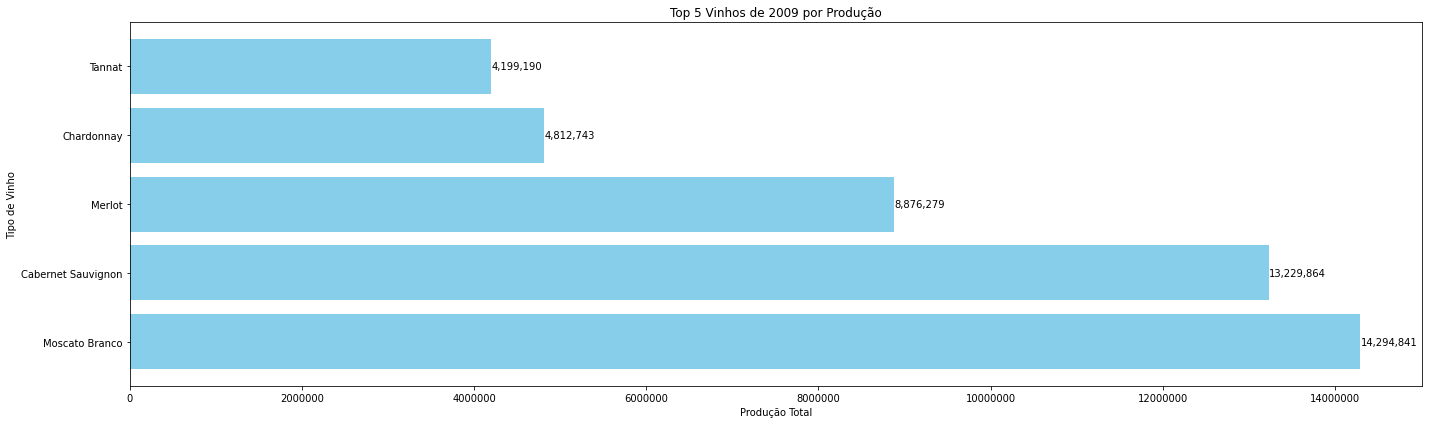

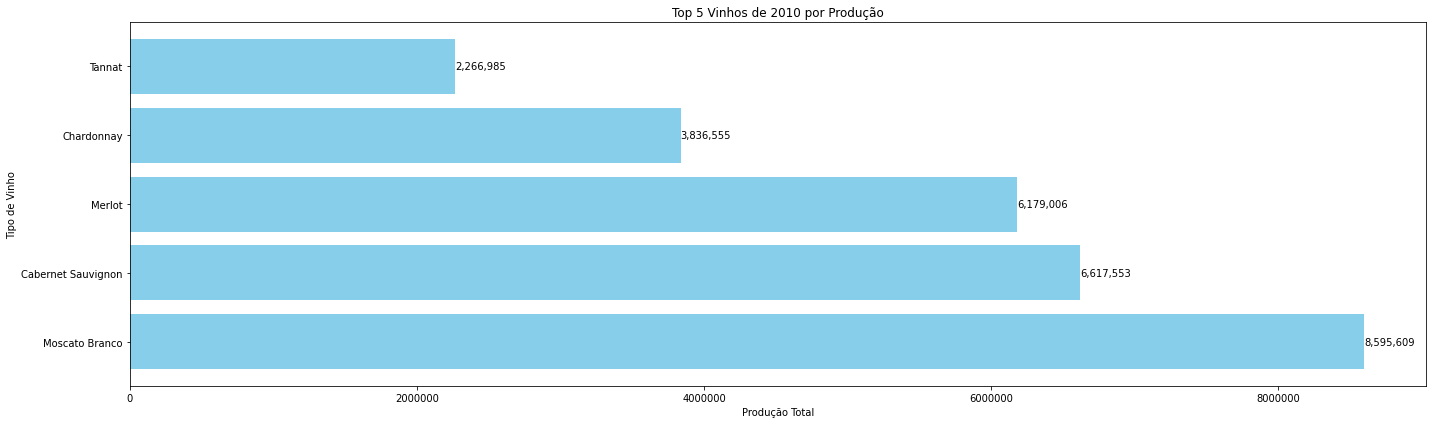

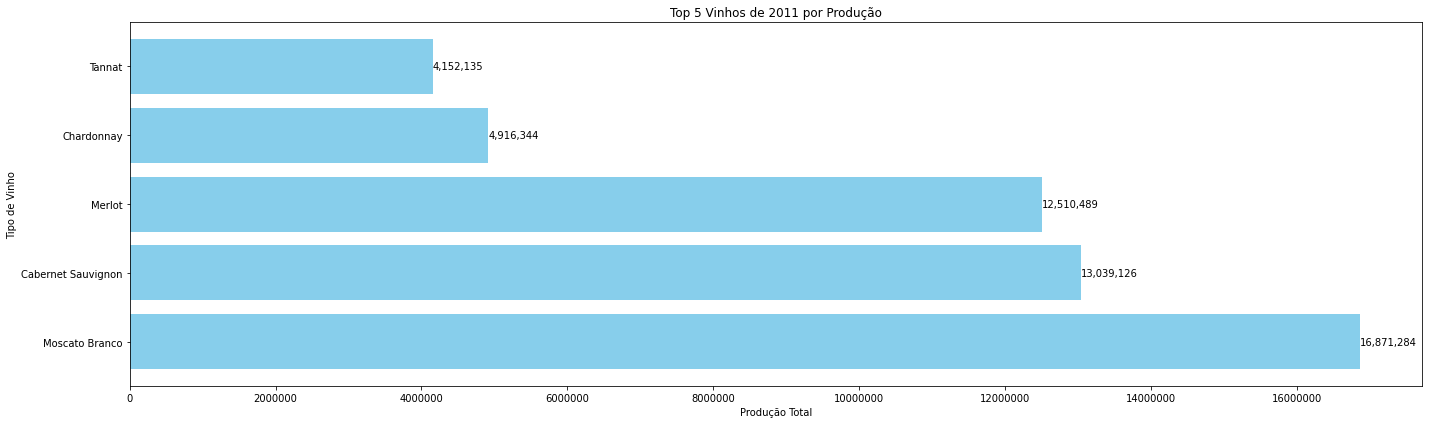

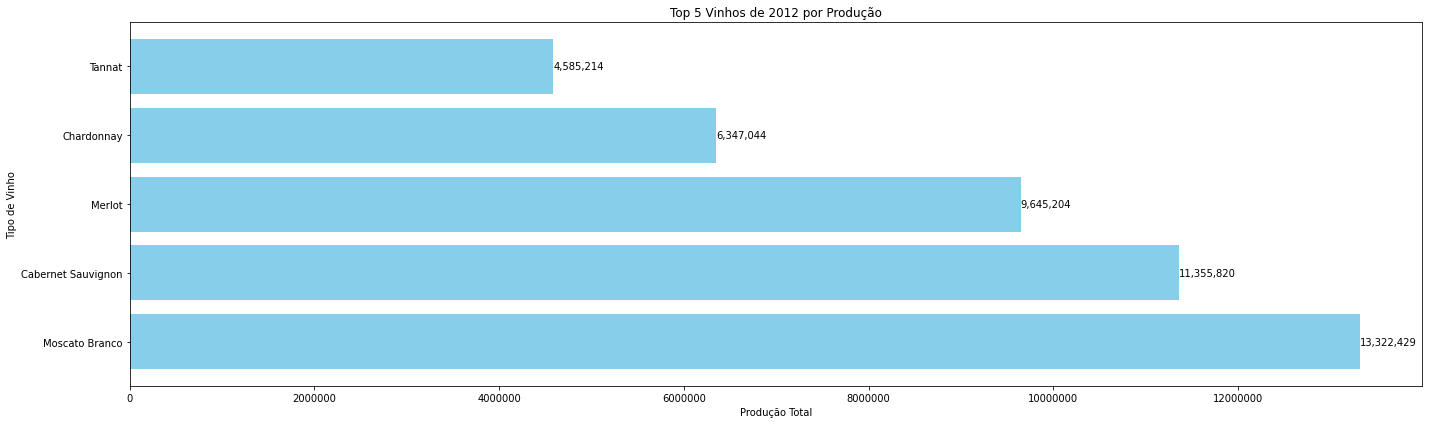

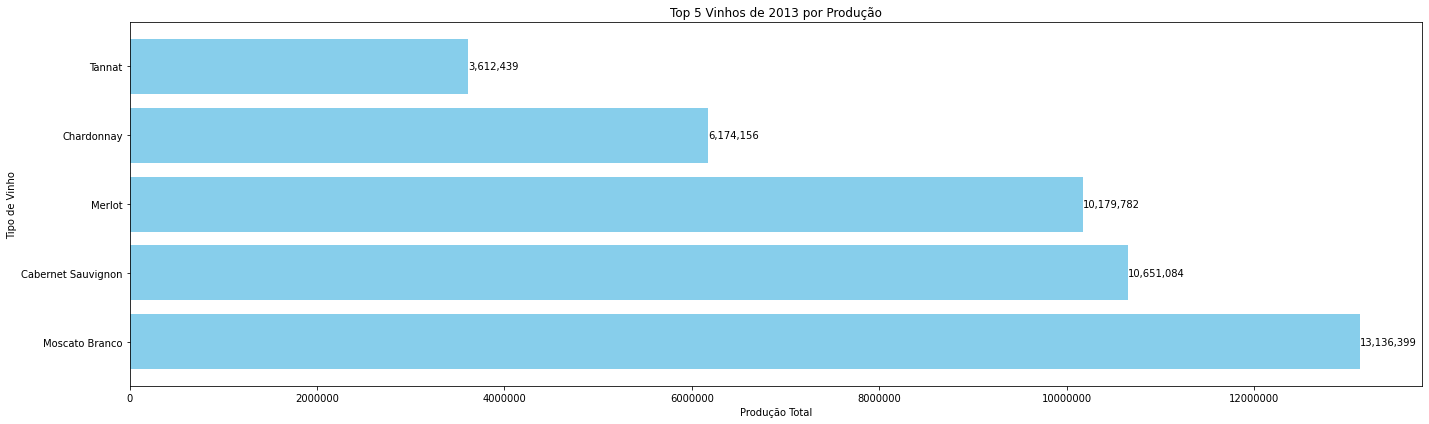

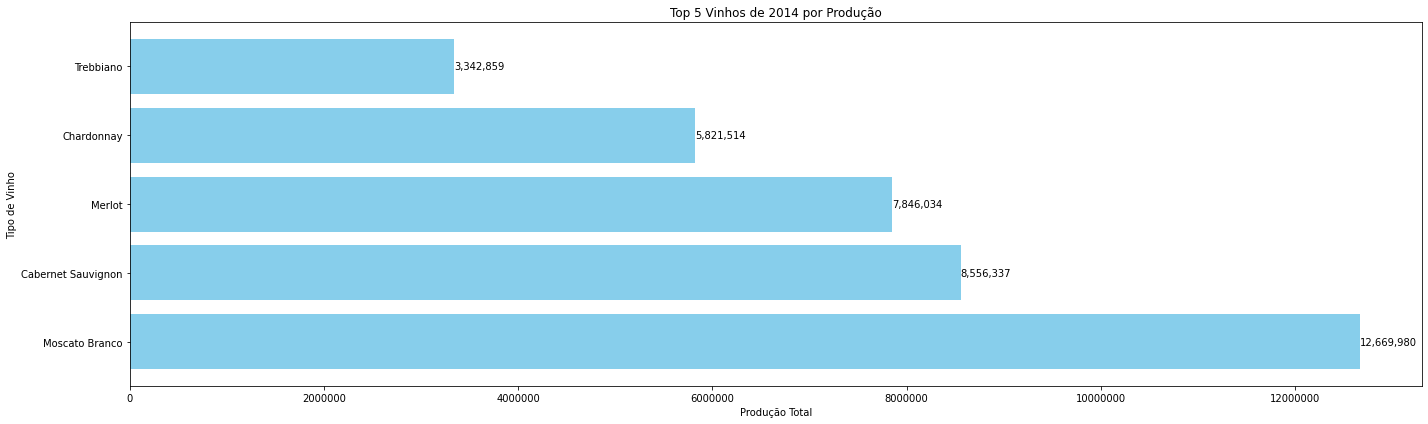

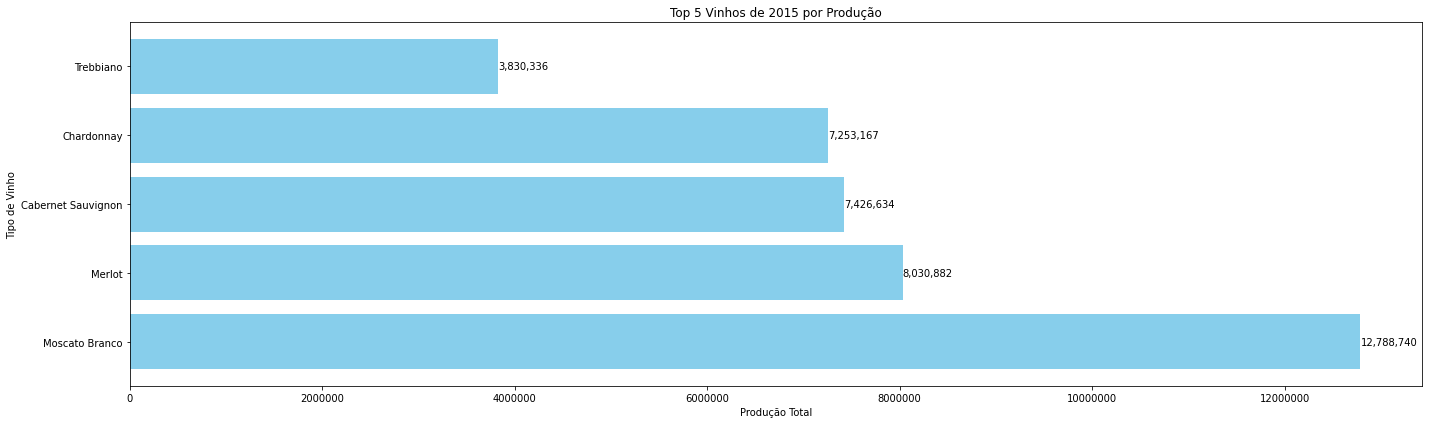

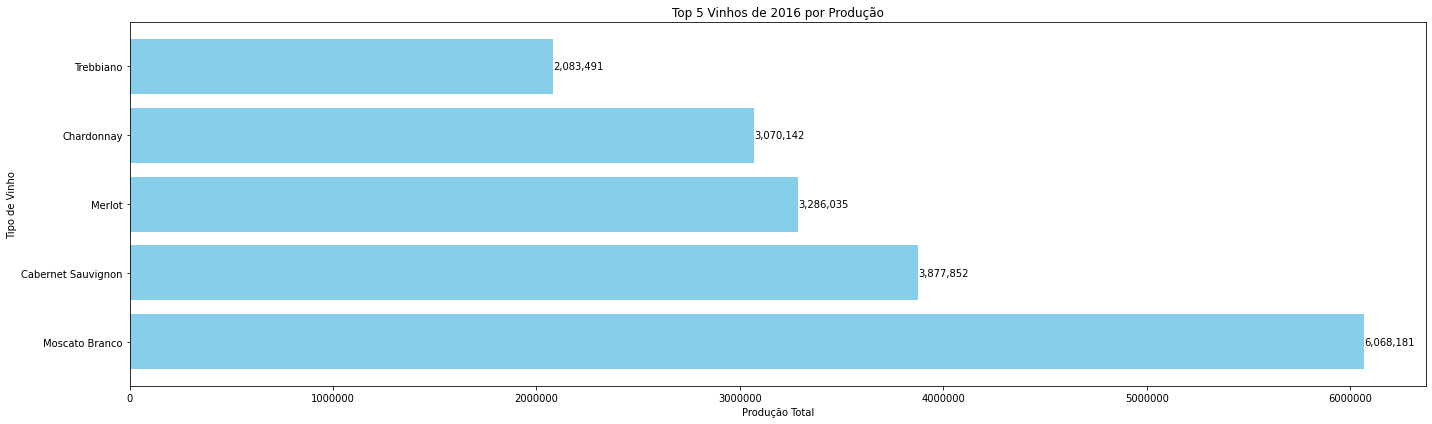

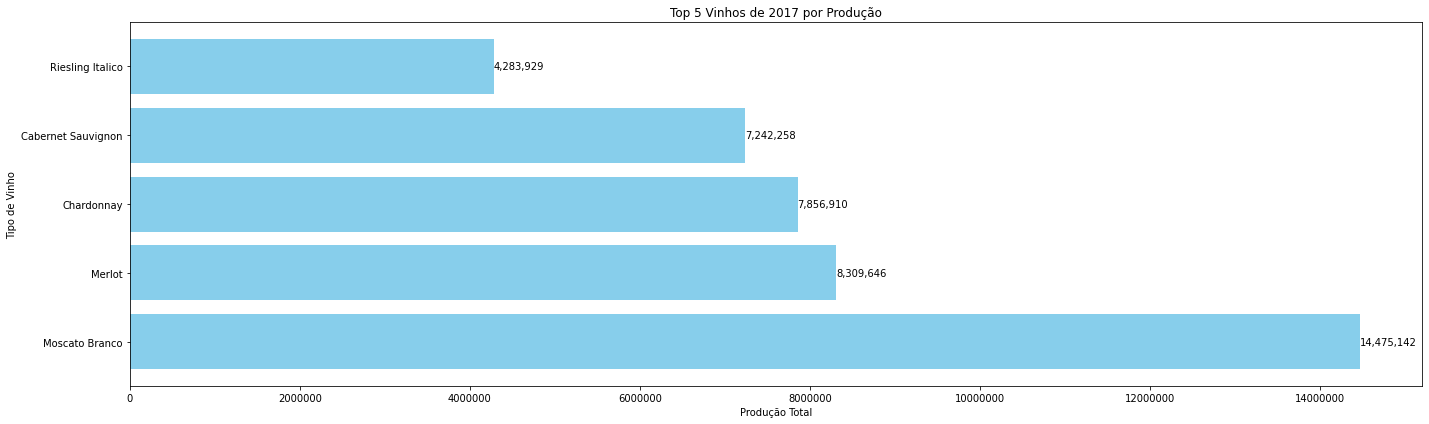

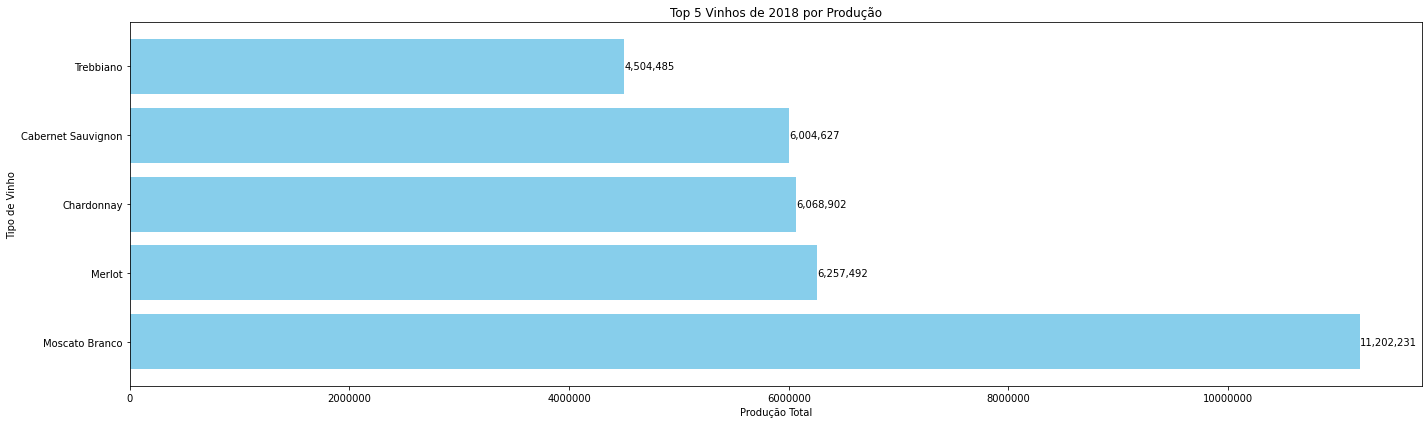

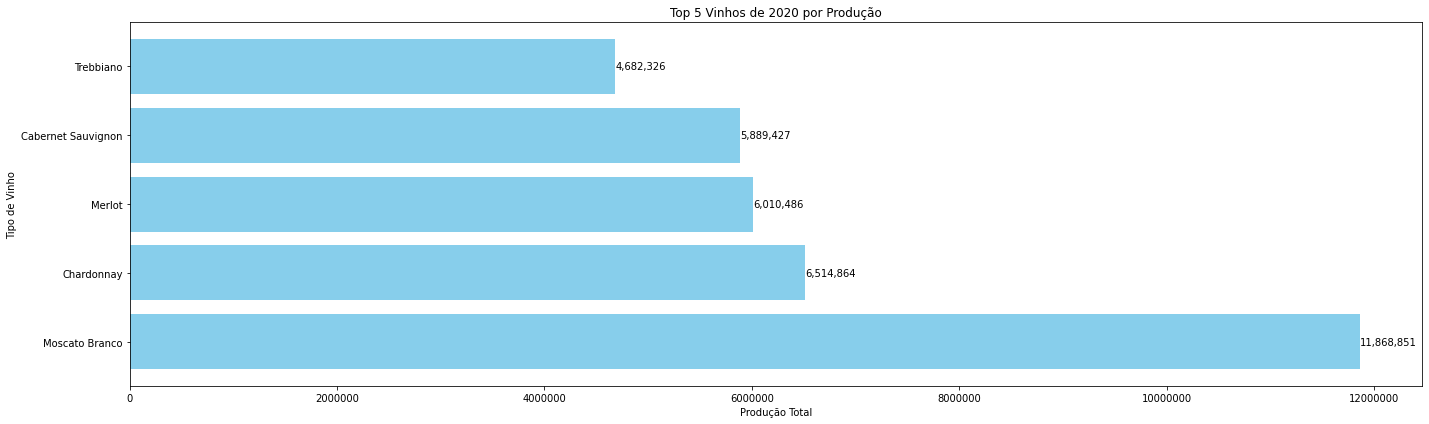

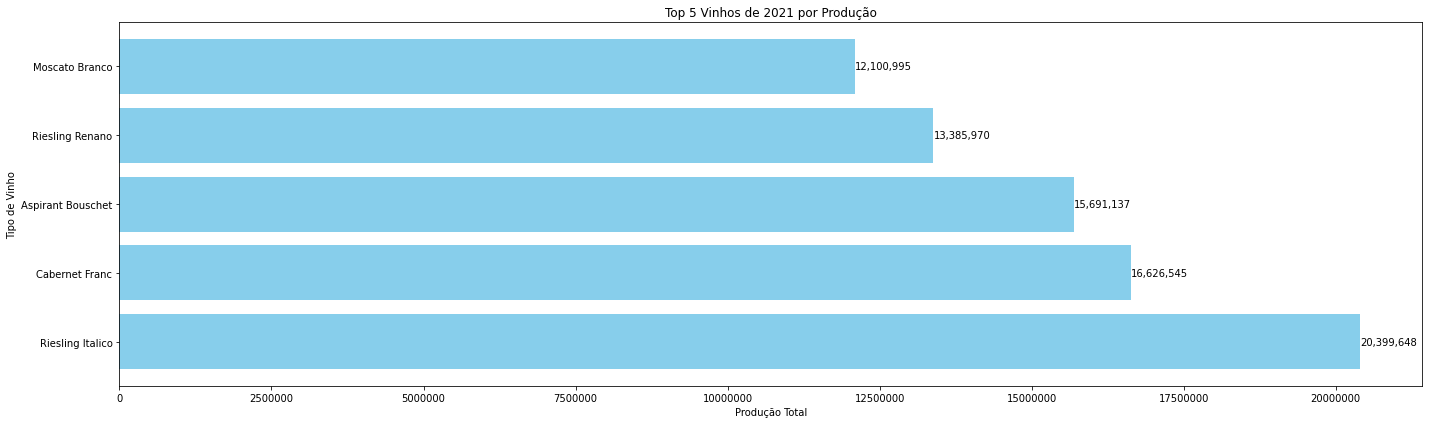

O vinho Cabernet Sauvignon apareceu 14 vezes no top 5.
O vinho Moscato Branco apareceu 15 vezes no top 5.
O vinho Merlot apareceu 14 vezes no top 5.
O vinho Cabernet Franc apareceu 3 vezes no top 5.
O vinho Tannat apareceu 8 vezes no top 5.
O vinho Chardonnay apareceu 12 vezes no top 5.
O vinho Trebbiano apareceu 5 vezes no top 5.
O vinho Riesling Italico apareceu 2 vezes no top 5.
O vinho Aspirant Bouschet apareceu 1 vezes no top 5.
O vinho Riesling Renano apareceu 1 vezes no top 5.


In [11]:
# Lista para contar a frequência de cada vinho
frequencia_vinhos = {}

for ano in top_5_por_ano['Ano'].unique():
    dados_ano = top_5_por_ano[top_5_por_ano['Ano'] == ano]

    plt.figure(figsize=(20, 6))
    plt.barh(dados_ano['Vinhos'], dados_ano['Total'], color='skyblue')
    plt.title(f'Top 5 Vinhos de {ano} por Produção')
    plt.xlabel('Produção Total')
    plt.ylabel('Tipo de Vinho')

    for index, value in enumerate(dados_ano['Total']):
        plt.text(value, index, f'{value:,}', ha='left', va='center')  # Adicionando os valores nos marcadores

    plt.ticklabel_format(axis='x', style='plain')
    plt.tight_layout()

    # Atualizando a frequência de cada vinho
    for wine in dados_ano['Vinhos']:
        if wine in frequencia_vinhos:
            frequencia_vinhos[wine] += 1
        else:
            frequencia_vinhos[wine] = 1

    plt.show()

# Exibindo a frequência de aparição de cada vinho no top 5 ao longo dos anos
for wine, frequency in frequencia_vinhos.items():
    print(f"O vinho {wine} apareceu {frequency} vezes no top 5.")

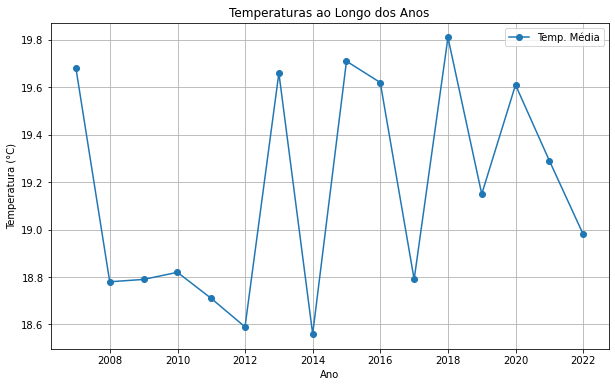

In [27]:
# Configure o gráfico
plt.figure(figsize=(10, 6))

plt.plot(climatic_data_final_year['data'], climatic_data_final_year['temp_media'], marker='o', label='Temp. Média')
#plt.plot(climatic_data_final_year['data'], climatic_data_final_year['precipitacao_total'], marker='o', label='Precipitação Total')
#plt.plot(climatic_data_final_year['data'], climatic_data_final_year['humid_media'], marker='o', label='Umidade Média')

plt.title('Temperaturas ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.legend()
plt.savefig('d.png')
plt.show()


In [13]:
# Ordenando o DataFrame com base na temperatura média e umidade média em ordem decrescente
ordenacao_tempumidade = climatic_data_final_year.sort_values(by=['temp_media', 'humid_media'], ascending=[False, False])

# Mostrando o DataFrame ordenado
dfordenacao = pd.DataFrame(ordenacao_tempumidade)
dfordenacao

,data,precipitacao_total,temp_max,temp_min,humid_media,temp_media
11,2017-12-31,5.18,24.87,14.76,76.89,19.81
8,2014-12-31,5.57,24.56,14.86,77.83,19.71
0,2006-12-31,3.57,24.67,14.69,73.77,19.68
6,2012-12-31,3.72,24.93,14.40,73.75,19.66
9,2015-12-31,5.80,24.25,14.99,79.42,19.62
13,2019-12-31,4.64,24.76,14.47,77.02,19.61
14,2020-12-31,3.58,24.95,13.63,72.98,19.29
12,2018-12-31,4.56,24.21,14.09,77.80,19.15
15,2021-12-31,3.63,24.40,13.56,75.61,18.98
3,2009-12-31,4.97,23.86,13.77,77.15,18.82


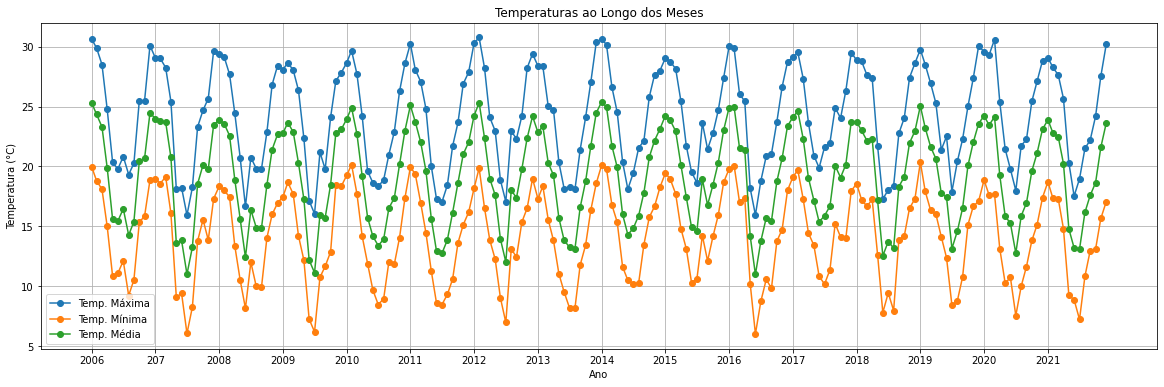

In [29]:
# Configure o gráfico
plt.figure(figsize=(20, 6))
plt.plot(climatic_data_final_month['data'], climatic_data_final_month['temp_max'], marker='o', label='Temp. Máxima')
plt.plot(climatic_data_final_month['data'], climatic_data_final_month['temp_min'], marker='o', label='Temp. Mínima')
plt.plot(climatic_data_final_month['data'], climatic_data_final_month['temp_media'], marker='o', label='Temp. Média')

plt.title('Temperaturas ao Longo dos Meses')
plt.xlabel('Ano')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.legend()

plt.xticks(climatic_data_final_month['data'][::12],[2006,207,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
plt.xlabel("Ano")

plt.savefig('temperatura.png')
plt.show()

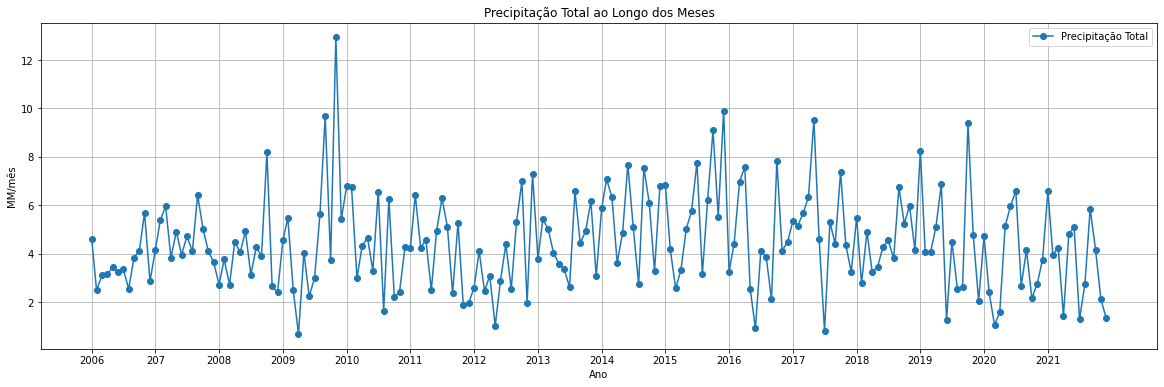

In [34]:
# Configure o gráfico
plt.figure(figsize=(20, 6))
plt.plot(climatic_data_final_month['data'], climatic_data_final_month['precipitacao_total'], marker='o', label='Precipitação Total')
#plt.plot(climatic_data_final_year['data'], climatic_data_final_year['humid_media'], marker='o', label='Umidade Média')

plt.title('Precipitação Total ao Longo dos Meses')
plt.xlabel('Ano')
plt.ylabel('MM/mês')
plt.grid(True)
plt.legend()
plt.xticks(climatic_data_final_month['data'][::12],[2006,207,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
plt.xlabel("Ano")
plt.savefig('precipitacao.png')
plt.show()

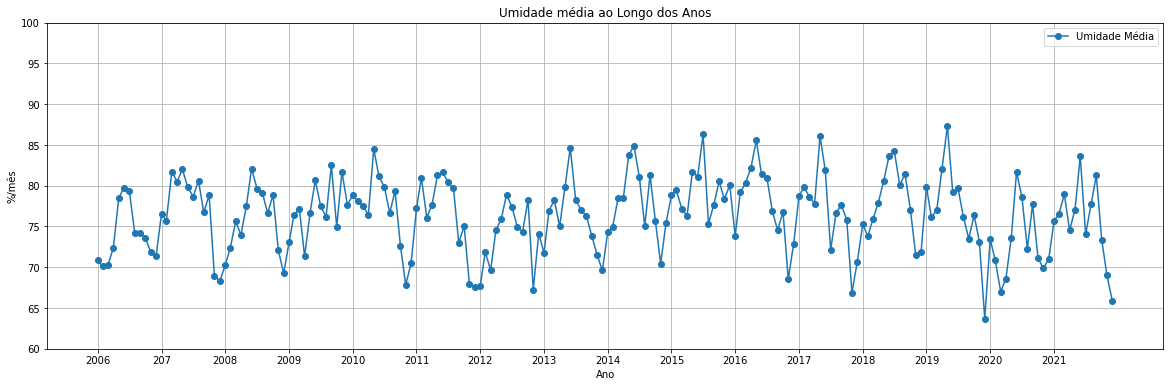

In [35]:
# Configure o gráfico
plt.figure(figsize=(20, 6))
plt.plot(climatic_data_final_month['data'], climatic_data_final_month['humid_media'], marker='o', label='Umidade Média')
#plt.plot(climatic_data_final_year['data'], climatic_data_final_year['humid_media'], marker='o', label='Umidade Média')

plt.title('Umidade média ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('%/mês')
plt.grid(True)
plt.legend()
plt.xticks(climatic_data_final_month['data'][::12],[2006,207,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
plt.xlabel("Ano")
plt.ylim(60,100)
plt.savefig('umidade.png')
plt.show()

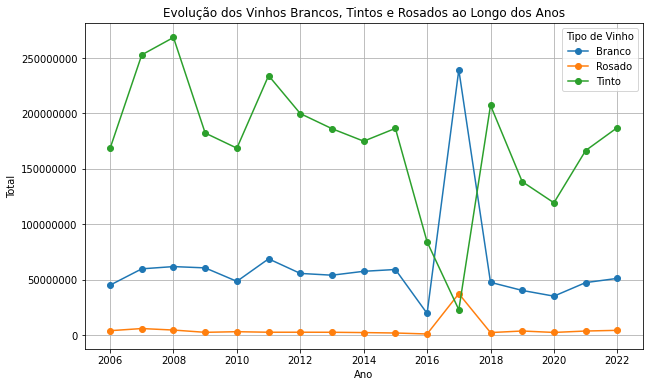

In [17]:
dfproducao = dfproducao_melt[(dfproducao_melt['tipo'] == 'VINHO DE MESA') | (dfproducao_melt['tipo'] == 'VINHO FINO DE MESA (VINÍFERA)')]
dfproducao_group = dfproducao.groupby(['produto', 'ano'])['Total'].sum().reset_index()
dfproducao_group = dfproducao_group.rename(columns={'produto':'vinho'})
#dfproducao_group

# Crie um gráfico de linhas com uma linha para cada tipo de vinho
fig, ax = plt.subplots(figsize=(10, 6))

for produto in dfproducao_group['vinho'].unique():
    data = dfproducao_group[dfproducao_group['vinho'] == produto]
    ax.plot(data['ano'], data['Total'],  marker='o',label=produto)

plt.title('Evolução dos Vinhos Brancos, Tintos e Rosados ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Total')
plt.legend(title='Tipo de Vinho')
plt.grid(True)
plt.ticklabel_format(axis='y', style='plain')
plt.show()